<a href="https://colab.research.google.com/github/chaidosa/100-days-of-DS/blob/main/Day_11_to_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 11
<br/>
# Principal component analysis (PCA)
Goal: Develop a way to find a "compressed" representation of data. <br/>
<br/>
General steps for PCA <br/>
1. Data Preparation: This involves cleaning data, checking missing values, and normalizing or standardizing the variables if necessary.
<br/>
<br/>
2. Compute the Covariance Matrix: PCA works by finding the directions in which the data varies the most. To do this, we need to compute the covariance matrix, which represents the relationships between the variables in the dataset.
<br/>
<br/>
3. Compute the Eigenvectors and Eigenvalues: After computing the covaraince matrix, we need to find the eigenvectors and eigenvalues. The eigenvectors represent the directions of the data that vary the most, while the eigenvalues represent the amount of variance explained by each eigenvector.
<br/>
<br/>
4. Sort the Eigenvalues: Next, we sort the eigenvalues in descending order. This helps us identify the most important eigenvectors and decide how many principal components to retain.
<br/>
<br/>
5. Choose the Number of Principal Components: The number of principal components to retain depends on the amount of variance we want to explain. A common approach is to retain enough principal components to explain at least 70-80% of the total variance in the dataset.
<br/>
<br/>
6. Compute the Principal Components: We can now compute the principal components by multiplying the standardized data with the eigenvectors corresponding to the selected principal components.
<br/>
<br/>
7. Analyze the Results: Finally, we can analyze the results and interpret the principal components. The principal components can be used for data visualization, data compression, or as input for other machine learning algorithms.


## Sample Example

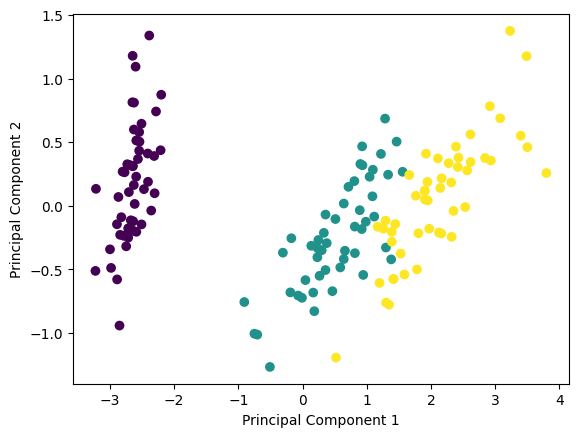

In [3]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Loading the iris dataset
d = load_iris()

# Creating a PCA object with 2 components
pca = PCA(n_components=2)

# Fit the PCA model to the data
X_pca = pca.fit_transform(d.data)

# Plot the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=d.target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In this example, we load the iris dataset, create a PCA object with 2 components, and fit the model to the data. We then transform the data into the 2-dimensional principal component space and plot the results using matplotlib. The resulting plot shows the data points projected onto the first two principal components, with different colors representing the three different classes of iris flowers. This can help us visualize how the data is distributed in the reduced dimensionality space.